<a href="https://colab.research.google.com/github/adamecius/bojos_per_la_fisica_ICN2/blob/main/BojosPerLaFisica_Nanoelectronica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bojos per la Física

# **Práctica #0: Preparación**

Por favor, ejecute la celda de abajo pulsando el boton de play y espere el mensaje

> "All requested packages already installed."

Esto puede tardar un par de minutos

In [ ]:
%%bash
rm -Rf bojos_per_la_fisica_ICN2/ && git clone https://github.com/adamecius/bojos_per_la_fisica_ICN2.git&>log
mv bojos_per_la_fisica_ICN2/* .
bash install_kwant.sh

Lo que se hizo anteriormente fue inicializar el entorno de programación. Ahora vamos a habilitar las bibliotecas. Por favor, ejecute la celda de abajo pulsando el boton de play y espere el mensaje

> "Bibliotecas cargadas. ¡Bienvenidos!"



In [ ]:
import bojos
import kwant
import numpy as np
import matplotlib.pyplot as plt
from time import time
import  matplotlib.backends

print(bojos.welcome)


# **Práctica #1: Transporte de carga en nanodispositivos**


El primer ejercicio consiste en la visualización de una cinta de grafeno y su comparación con lo que simulamos en ICN2.

**Ejecute la celda a continuación pulsando el boton de play.**

In [ ]:
bojos.ejemplo_grafeno_real()

El grafeno es un material compuesto únicamente por carbono, y su estructura cristalina es una red panal de abeja o honeycomb. 

En icn2, simulamos el grafeno como una cinta, con largo L y ancho W.  veamos como la simulamos en ICN2. A continuación, cambie los valores L y W y observe como cambia nuestro modelo

**Ejecute la celda a continuación pulsando el boton de play.**

In [ ]:
L= 2        #Largo en nanometros 
W= 3        #Ancho en nanometros
grafeno = bojos.crear_cable(L,W);
bojos.graficar_sistema(grafeno);

Ya hemos visto como podemos simular una red de grafeno, pero para medirla. Lo que sigue es un ejemplo de un dispositivo de hecho de grafeno. Las barras encima son contactos por donde se aplica un voltaje. El grafeno sirve como un cable con una resistencia.

**Ejecute la celda a continuación pulsando el boton de play.**

In [ ]:
bojos.ejemplo_dispositivo_grafeno()

En nuestro caso, usaremos como contacto el propio grafeno, y lo diferenciaremos del cable coloreandolo en rojo. 

**Ejecute la celda a continuación pulsando el boton de play.**

In [ ]:
L= 5        #Largo en nanometros 
W= 4        #Ancho en nanometros
grafeno = bojos.crear_cable(L,W);
grafeno = bojos.agregar_contactos(grafeno,L, W);
bojos.graficar_sistema(grafeno);

# Práctica 1.1: Corriente en nanodispositivos

En el siguiente ejercicio, vamos a investigar como la corriente se transmite en un nanodispositivo. Antes de comenzar, pensemos un poco en las siguientes preguntas:

1. Al aplicar una diferencia de potencial, los electrones en el grafeno se aceleraran y daran origen a una corriente. Con esta idea en mente, la corriente puede asumir cualquier valor? 
2. En general, cuando un nanodispositivo es transferido a un substrato este tambien induce ligeras modificaciones a sus propiedades. Si ahora nuestro substrato hace que los atomos azules y rojos sean diferentes, como afectaria esto al transporte de carga del sistema?

Importante: Para esta sección, asumiremos que le ponemos un voltio al dispositivo siempre.



In [ ]:
L= 8        #Largo en nanometros 
W= 4        #Ancho en nanometros
sample=80   #puntos para el calculo
grafeno = bojos.crear_cable(L,W,m=0.1,c=0);
grafeno = bojos.agregar_contactos(grafeno,L, W);
bojos.graficar_sistema(grafeno);
real = 1
energy,current = bojos.calcula_corriente(grafeno,sample,real)


plt.plot(energy,current*1E6,color="tab:blue",lw=2.0)
plt.xlabel(r"Energy (eV)")
plt.ylabel(r"$I$ ($\mu$A)")
plt.xlim(-1,1)



### Ahora veamos que le sucede a las bandas de nuestro grafeno

In [ ]:
L= 8        #Largo en nanometros 
W= 4        #Ancho en nanometros
sample = 101 #puntos para el calculo

grafeno = bojos.crear_cable_infinito(L,W,m=0.1);
k,energias = bojos.calcula_bandas(grafeno,sample)

plt.plot(k,energias,color="tab:blue",lw=2)
plt.ylim(-1,1)
plt.ylabel(r"Energy (eV)",size=12)
plt.xlabel(r"$\vec{k}$",size=12)
plt.show()

# Práctica 1.2: Resistencia en nanodispositivos


En el siguiente ejercicio vamos a evaluar la dependencia de la resistencia con la longitud de los dispositivos. Primero, vamos a discutir la siguiente preguntas:

1. ¿Como se relaciona la resistencia con la longitud y el ancho?
2. ¿Qué es la resistividad?
3. ¿De qué depende la resistividad?

A continuación agregaremos desorden modificando algunos átomos de la red. Modifique el parametro "concentracion_impurezas" 

In [ ]:
L= 40        #Largo en nanometros 
W= 10        #Ancho en nanometros
concentracion_impurezas = 1 #concentración impurezas red en %
grafeno = bojos.crear_cable(L,W,c=concentracion_impurezas);
grafeno = bojos.agregar_contactos(grafeno,L, W);
bojos.graficar_sistema(grafeno);

Abajo haremos nuestras simulaciones cuánticas de resistencias para várias longitudes

**Ejecute la celda a continuación pulsando el boton de play.**

In [ ]:
num_medidas=1;
concentracion_impurezas = 00 #concentración impurezas red en %

Longitudes = np.linspace(1,40,40);
tot_time = time()
Resistencias=list();
for L in Longitudes:
  grafeno = bojos.crear_cable(L,W,c=concentracion_impurezas);
  grafeno = bojos.agregar_contactos(grafeno,L,W);
  Resistencias.append( bojos.calcula_resistencia(grafeno.finalized(),bojos.energy,num_medidas) );
elapsed_time = time() - tot_time
print("El calculo de la resistencia tardó\n",elapsed_time,"segundos")
 
plt.plot(Longitudes,Resistencias,"-o");
plt.xlabel("Longitud (nm)");
plt.ylabel("Resistencia (Ohm)");
#plt.ylim(0.1,0.15);

Ahora que tenemos los datos de la simulación cuántica, vamos a entenderlos. Primero, vamos a asumir que nuestra curva es ajustada por una recta, y determinemos sus valores.

**Ejecute la celda a continuación pulsando el boton de play.**


In [ ]:
m, b = np.polyfit(Longitudes, Resistencias, 1);
plt.plot(Longitudes,Resistencias,"-o");
plt.plot(Longitudes,m*Longitudes+b);
print("m L + b con m=",m," y b=",b)

#### Para entender mejor y de forma grafica lo que sucede, veamos como se distribuyen los electrones en el material

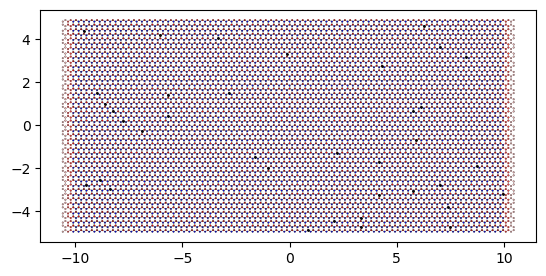

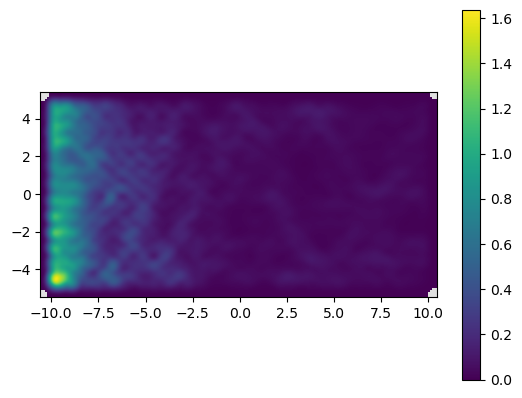

In [33]:
concentracion_impurezas = 0.5 #concentración impurezas red en %
L = 20
W = 10
desorden=20
grafeno = bojos.crear_cable(L,W,U=desorden,c=concentracion_impurezas);
grafeno = bojos.agregar_contactos(grafeno,L, W);
bojos.graficar_sistema(grafeno);
bojos.grafica_densidad(grafeno,bojos.energy) 


Parece que ajusta bien, pero:
> ¿Qué ocurre en L=0?
Para determinarlo vamos a calcular en sistemas más pequeños

**Ejecute la celda a continuación pulsando el boton de play.**

In [ ]:
num_medidas=1;
concentracion_impurezas = 0 #concentración impurezas red en %

Longitudes = np.linspace(0.5,1.2,10);
tot_time = time()
Resistencias=list();
for L in Longitudes:
  grafeno = bojos.crear_cable(L,W,c=concentracion_impurezas);
  grafeno = bojos.agregar_contactos(grafeno,L,W);
  Resistencias.append( bojos.calcula_resistencia(grafeno.finalized(),bojos.energy,num_medidas) );
elapsed_time = time() - tot_time
print("El calculo de la resistencia tardó\n",elapsed_time,"segundos")
 
plt.plot(Longitudes,Resistencias,"-o");
plt.xlabel("Longitud (nm)");
plt.ylabel("Resistencia (Ohm)");
plt.ylim(0.,1000);

m, b = np.polyfit(Longitudes, Resistencias, 1);
plt.plot(Longitudes,m*Longitudes+b);
print("m L + b con m=",m," y b=",b)

# Discutamos ahora los resultados.